In [15]:
from astroquery.mast import Observations
from datetime import datetime
import os

### Sort Observations by Mission

In [4]:
meta_table = Observations.get_metadata("observations")

In [5]:
jw = Observations.query_criteria(obs_collection='JWST')

KeyboardInterrupt: 

In [ ]:
Observations.query_criteria_count(obs_collection='JWST')

In [6]:
datalist = jw[jw['dataproduct_type'] == 'image']

NameError: name 'jw' is not defined

In [7]:
len(datalist)

NameError: name 'datalist' is not defined

In [7]:
# Your example product identifier
product_id = "jw01145-o002_t001_fgs_clear_i2d.jpg"

In [8]:
# MAST product path for the file you want
product_path = "mast:JWST/product/jw01145-o002_t001_fgs_clear_i2d.jpg"

# Download the file directly
file_path = Observations.download_file(product_path, local_path="test1.jpg", cache=True)

print(f"Downloaded file to {file_path}")

INFO: Found cached file test1.jpg with expected size 872635. [astroquery.query]
Downloaded file to ('COMPLETE', None, None)


In [17]:
xx = Observations.filter_products(datalist, jpegURL=product_path)

In [21]:
product_path.split('/')[-1]

'jw01145-o002_t001_fgs_clear_i2d.jpg'

In [ ]:
Observations.download_products

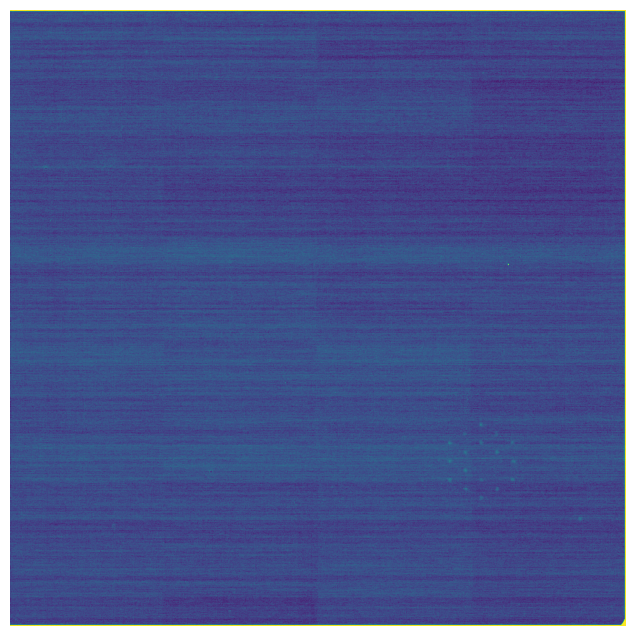

In [22]:
from PIL import Image
import matplotlib.pyplot as plt

# Open and display the downloaded JPG image
image = Image.open('data_03_47/jw01148-o035_t002_nircam_clear-f212n-nrca2_wfscmb-01.jpg')
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis("off")
plt.show()

In [12]:
jw[0]['jpegURL']

'mast:JWST/product/jw01410-o031_t040_nircam_clear-f480m_i2d.jpg'

In [13]:
jw = Observations.query_criteria(obs_collection='JWST')
datalist = jw[jw['dataproduct_type'] == 'image']
current_time = datetime.now().strftime("%H_%M")

In [16]:
# Specify the directory name and path
directory_name = './data_' + str(current_time) +'/'
path = "./" + directory_name  # Creates the directory in the current working directory
# Create the directory
os.mkdir(path)

In [17]:
i = 0
for row in datalist:
    product_path = row['jpegURL']
    save_file_path = Observations.download_file(product_path, local_path=directory_name+product_path.split('/')[-1], cache=True)
    i += 1
    if i > 10:
        break

In [15]:
jw[0]

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str11,str4,str7,str14,str4,str25,str8,str31,str130,str67,float64,float64,str12,str37,int64,float64,float64,float64,float64,float64,str164,float64,str4,str6,int64,str184,str93,str94,str16,bool,float64,str9,str9
calibration,JWST,CALJWST,NIRCAM/IMAGE,JWST,F480M,Infrared,LOS-TARGET-NIRCAM,--,jw01410-o031_t040_nircam_clear-f480m,118.155,-74.09916666666663,image,"Nelan, Edmund",3,59625.48724716956,59625.50153800926,1223.992,4662.0,4977.0,LOS-2 ACS Fine Guidance Control Verification,59774.8541666,1410,COM,--,POLYGON 118.107889424 -74.103885134 118.171032133 -74.072161312 118.287180506 -74.089483221 118.224196803 -74.121240755,mast:JWST/product/jw01410-o031_t040_nircam_clear-f480m_i2d.jpg,mast:JWST/product/jw01410-o031_t040_nircam_clear-f480m_i2d.fits,PUBLIC,False,nan,71673671,232275043
